# Práctico clasificación de imágenes
En este práctico vamos a implementar un clasificador de imágenes. El objetivo sería diseñar y entrenar un algoritmo que en forma automática clasifique una imagen como correspondiente a una clase entre varias. Las clases las vamos a elegir nosotros (perros y gatos, autos y motos, o algo más interesante o útil).

## Dataset
1. El primer paso es elegir las clases entre las 
que vamos a desambiguar. Para este ejemplo yo elegí aviones y helicopteros. Pueden elegir más de 2 clases.
1. El segundo paso es buscar imágenes en internet en donde aparezcan los objetos que elegimos.
1. Las imágenes las vamos a guardar con la siguiente estructura de directorios:
- dataset
  - train
    - airplanes
      - imagen01.xxx
      - ...
      - imagenXX.xxx
    - helicopters
      - imagen01.xxx
      - ...
      - imagenXX.xxx
  - test
    - airplanes
      - imagen01.xxx
      - ...
      - imagenXX.xxx
    - helicopters
      - imagen01.xxx
      - ...
      - imagenXX.xxx

La cantidad de imágenes de entrenamiento debe ser aproximadamente del 80% y las de test del 20%. También hay que tratar de tener aproximadamente la misma cantidad de imágenes de cada clase (100 helicópteros y 100 aviones).
1. Después de esto comprimimos en un zip el dataset.



## Leer dataset desde colab
1. Subir dataset.zip a drive
1. Montamos nuestro drive
1. Nos pide que abramos un link y después que carguemos el código que nos devuelve. Cargamos el código y presionamos Enter.
1. Luego de eso descomprimimos el archivo.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!unzip "/content/drive/My Drive/dataset.zip"

Archive:  /content/drive/My Drive/dataset.zip
   creating: dataset/
   creating: dataset/train/
   creating: dataset/train/autos/
  inflating: dataset/train/autos/0001.jpg  
  inflating: dataset/train/autos/0002.jpg  
  inflating: dataset/train/autos/0003.jpg  
  inflating: dataset/train/autos/0005.jpg  
  inflating: dataset/train/autos/0006.jpg  
  inflating: dataset/train/autos/0007.jpg  
  inflating: dataset/train/autos/0008.jpg  
  inflating: dataset/train/autos/0009.jpg  
  inflating: dataset/train/autos/0011.jpg  
  inflating: dataset/train/autos/0013.jpg  
  inflating: dataset/train/autos/0014.jpg  
  inflating: dataset/train/autos/0015.jpg  
  inflating: dataset/train/autos/0017.jpg  
  inflating: dataset/train/autos/0018.jpg  
  inflating: dataset/train/autos/0020.jpg  
  inflating: dataset/train/autos/0021.jpg  
  inflating: dataset/train/autos/0022.jpg  
  inflating: dataset/train/autos/0023.jpg  
  inflating: dataset/train/autos/0025.jpg  
  inflating: dataset/train/autos/0

In [3]:
!ls

dataset  drive	sample_data


## Usar el dataset

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/dataset/train',
                                                 target_size=(64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 172 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


## Diseñar el modelo
Completar la celda siguiente con el código para construir el modelo.

In [62]:
# Código para construir el modelo

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(6, (6, 6), activation = 'relu', input_shape = (64, 64, 3)),
									                  tf.keras.layers.Conv2D(12, (5, 5), strides = (2, 2), activation = 'relu'),
									                  tf.keras.layers.Conv2D(24, (4, 4), strides = (2, 2), activation = 'relu'),
									                  tf.keras.layers.Flatten(),
									                  tf.keras.layers.Dropout(rate = 0.25),
									                  tf.keras.layers.Dense(200, activation = 'relu'),
                                    tf.keras.layers.Dense(10, activation = 'softmax'),
                                    tf.keras.layers.Dense(2, activation = 'softmax')
									                  ])
									

optimizer = tf.keras.optimizers.Adam(decay = 0.0001)

model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Entrenamos el modelo


In [63]:
model.fit(training_set,
          epochs = 25)

Epoch 1/25
6/6 [==============================] - 0s 54ms/step - loss: 0.7014 - accuracy: 0.5116
Epoch 2/25
6/6 [==============================] - 0s 62ms/step - loss: 0.6792 - accuracy: 0.6686
Epoch 3/25
6/6 [==============================] - 0s 54ms/step - loss: 0.6128 - accuracy: 0.8081
Epoch 4/25
6/6 [==============================] - 0s 63ms/step - loss: 0.4924 - accuracy: 0.8081
Epoch 5/25
6/6 [==============================] - 0s 55ms/step - loss: 0.4876 - accuracy: 0.7965
Epoch 6/25
6/6 [==============================] - 0s 54ms/step - loss: 0.4305 - accuracy: 0.8430
Epoch 7/25
6/6 [==============================] - 0s 53ms/step - loss: 0.4086 - accuracy: 0.8488
Epoch 8/25
6/6 [==============================] - 0s 55ms/step - loss: 0.4085 - accuracy: 0.8721
Epoch 9/25
6/6 [==============================] - 0s 54ms/step - loss: 0.3929 - accuracy: 0.9128
Epoch 10/25
6/6 [==============================] - 0s 54ms/step - loss: 0.3729 - accuracy: 0.9070
Epoch 11/25
6/6 [============

## Evaluamos el modelo
Lograr al menos un 80% de exactitud en la clasificación.


In [64]:
model.evaluate(test_set)

2/2 [==============================] - 0s 7ms/step - loss: 0.3715 - accuracy: 0.8500


[0.37149888277053833, 0.8500000238418579]

## Probamos el modelo
1. Buscar 2 imágenes nuevas.
1. Mostrarlas en pantalla (matplotlib). 
1. Clasificarlas con nuestro modelo.
1. Mostrar el resultado de la clasificación.

Completar la siguiente celda con el código para realizar lo anterior.

In [65]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

[[0.18108554 0.8189145 ]]
tf.Tensor([[0.3457375  0.65426254]], shape=(1, 2), dtype=float32)
La imagen se corresponde con la de una moto en un 65.43 %.


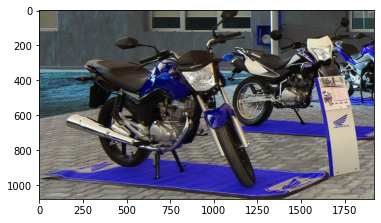

In [77]:
# Completar código para probar el modelo

img1 = cv2.imread('/content/drive/My Drive/Ejemplos_Clasificador/ejemplo_moto.jpg')

img = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Ejemplos_Clasificador/ejemplo_moto.jpg', target_size=(64, 64, 3))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

imgplot = plt.imshow(img1)

predictions = model.predict(img_array)

score = tf.nn.softmax(predictions)

print(predictions)
print(score)

class_names = ['un auto', 'una moto']
print("La imagen se corresponde con la de {} en un {:.2f} %." 
      .format(class_names[np.argmax(score)], 100 * np.max(score)))

